### run the following cell first

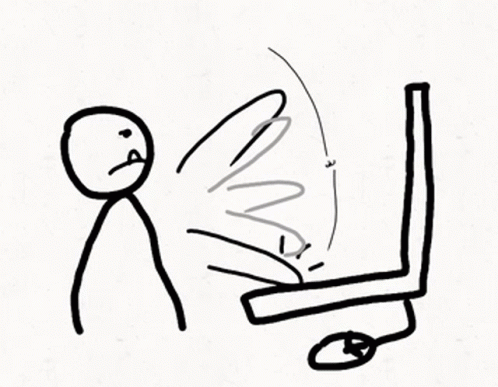 


In [1]:
import sys
import os.path
sys.path.append(os.path.abspath('../'))
from helper_modules.mentimeter import Mentimeter


from IPython.display import HTML, Javascript
import random as rn

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Show/hide - this code is not to be edited'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text = 'Show/hide next cell - this code is not to be edited'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(rn.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return display (HTML(html))

# use 'hide_toggle()' to hide the cell
# use 'hide_toggle(for_next=True)' to hide the next cell


def run_nxt():
    hide_toggle(for_next=True)
    jvs = """Jupyter.notebook.get_next_cell(); var indx = Jupyter.notebook.find_cell_index(); Jupyter.notebook.execute_cell(indx+1)"""""
    return  display (Javascript(jvs))
    
#use 'run_nxt()' for execution of the next cell automatically


---

<span style="color:RED">**PLEASE NOTE** THAT THE MATERIAL DISTRIBUTED BEFORE THE LESSON IS ONLY TO GIVE AN OUTLINE, 
    SO IT IS MISSING SOLUTIONS AND SOME PARTS OF THE LESSON. </span>
    
    
 <span style="color:RED">YOU WILL NEED TO **RETRIEVE A NEW WORKBOOK BEFORE THE SESSION**.</span>



----

# Statistics for Chemists with Python

Dr Valentina Erastova
<valentina.erastova@ed.ac.uk>

School of Chemistry, 
University of Edinburgh

----
<a class="anchor" id="teabags"></a>

## Lesson Plan <a id="Plan"></a>

Straight as you join, you will be sent to break out rooms to *warm up with some math* 

We will then look into arrays and NumPy those are useful for working with real raw data from experiments.
We will cover 1D and 2D arrays, hpw to generate them, do mathematical operations, to read and write arrays into the files 

After a short break we will look into the scientific notation, units, constants and how to use the available libraries

We will then go into break out rooms, where instead of writing code, I would like you to talk about errors. Followed by a short break, we will come back to discuss errors and what can we do to ensure good data.

For the final part of the session we will do some basic statistical operations, finding averages and means, calculating statistical deviations and understanding what they mean for the real data

        
----

## Learning Outcomes  <a id="learning"></a>


- math on the data collections
- sci notation, constants & sig figs 
- errors sources and mitigarions: DISCUSSION
- numpy arrays 
- stats - operations on data: STD, mean, average

----

<span style="color:green">**BREAKOUT ROOMS 1**</span>

## 1 - Warm up Math <a id="warmup"></a>

Let's first warm up our fingers with basic math
 

<div class="alert alert-success">
    <b>TASK 1.</b>  
    Calculate the following:
    
</div>
<div class="alert alert-success">
        $1+1+2+3+5-8$
</div>

In [ ]:
run_nxt()
# your calculations:




In [ ]:
#this is a test, do not delete
assert _ == 4, 'check your math'


<div class="alert alert-success">
    $ 10 \times 3 + 4(2 + 3) \div (5 \times 8) $
</div>




In [ ]:
run_nxt()
# your calculations:





In [ ]:
#this is a test, do not delete
assert  _  == 30.5

<div class="alert alert-success">
    $ 10 \times 3 + 4(2 + 3) \div (5 \times 8) $
</div>

In [ ]:
run_nxt()
# your calculations:





In [ ]:
#this is a test, do not delete
assert  _  == 30.5

<div class="alert alert-success">
    $16 ^ {-0.5}$
   
</div>

In [ ]:
run_nxt()
# your calculations:





In [ ]:
#this is a test, do not delete
assert _  == 0.25

<div class="alert alert-success">
$\sqrt9$   
</div>

<div class="alert alert-info">
    <b>Hint</b> : <code>sqrt( )</code> is the 'square root of' operator
</div>



In [ ]:
run_nxt()
# your calculations:





In [ ]:
#this is a test, do not delete
assert _ == "**", "Well done for using the power operator, now try sqrt()"
assert _ == "sqrt", "The task asked you to use sqrt(9)"
assert _ == 3, "something not right"

**Did you get an error like this?**

<span style="font-family:monospace"><span style="color:red">NameError</span><span>: name 'sqrt' is not defined</style></span>. 


for code efficiency only a minimal set of tools is available as default. There is [The Python Standard Library](https://docs.python.org/3/library/index.html), which includes also **mathematical functions** in a module `math`  


We can load it like this:

```python
import math
math.sqrt(9)
```

In [ ]:
#try again using the module math





<div class="alert alert-success">

import necessary functions and constants and print value of $\pi$   
</div>


In [ ]:
run_nxt()
#import the necessary functions and constants



#and print value of pi




In [ ]:
#this is a test, do not delete
assert  _  == 3.141592653589793, "This doesn't look like \pi you would get from the math"

<div class="alert alert-success">

what is $sin (\pi/2)$
</div>


In [ ]:
run_nxt()
# what is sinus of pi/2?




In [ ]:
#this is a test, do not delete
assert  _  == "pi", "This doesn't look right, are you sure?"

<div class="alert alert-success">

what is $\ln(e^2)$
</div>

In [ ]:
run_nxt()
# what is ln(e^2)?



In [ ]:
# do not delete
assert _!= 0.8685889638065035 , "Are you sure you are not coinfusing log to the power of 10 and natural log?"
assert _==2.0, "Something not right with the ln(e^2)"

<span style="color:green"> **CLOSE BREAKOUT ROOMS 1**</span>




[back to top](#teabags)

-----




# Arrays and NumPy <a id="arrays"></a>
    
Arrays is a smart way of storing multidimentional numerical data.

**NumPy**, which stands for *Numerical Python*, is a module consisting of multidimensional array objects and a collection of routines for processing those arrays. 

Using NumPy, mathematical and logical operations on arrays can be performed, as it works on arrays.

NumPy is a base for many other modules, incl. Pandas and so can be used together.

We can import the numpy:

```python
import numpy as np

```

This allows us to use abbreviation `np.` prefacing any further function, e.g. `np.multipy`

In [ ]:
#import numpy




---

## 1D Arrays <a class="anchor" id="1D"></a>

NumPy arrays are homogeneous in nature, i.e. they comprise **one data type** (integer, float, double, etc.) unlike lists that can be a mix of data types.

### Generating 1D arrays <a class="anchor" id="1Dgen"></a>

For example, to create an array of integers (single numbers like 1, 2, 3, 4, 5) we can do it like so:

<img src="nparray.png" width="500">

In [ ]:
#Writing in 1D numpy array:




And now lets look at **properties** of our array  <a class="anchor" id="1Dprop"></a>




In [ ]:
#Assign array to a variable



#Check the properties of this 1D array







You can also use **functions** within numpy to generate these arrays, for example lets use `np.zeros(shape)` and generate a 1D array:


<img src="nparray3.png" width="500">

In [ ]:
#creating an array




---

<span style="color:green">**BREAKOUT ROOMS 2**</span>

<div class="alert alert-success">
    <b>TASK 2.1 </b> : 
    generate a 1D array of length of 5 filled with ones 
   
</div>



In [ ]:
run_nxt()
# your solution here!



In [ ]:
#do not delete 
assert __.size != 5, 'Have you made it different lengths?'

To create an array that has a given sequence, instead of having to type:

```python
sequence = np.array( [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20] )
```

you can use function 
```python
np.arange(start, finish, stepsize)
```
<div class="alert alert-success">
    <b>TASK 2.2 </b> : 
Try to go from 0 to 20 in steps of 2, using <code>np.arrange</code>
   
</div>





In [ ]:
# make a 1D array using np.arrange





<div class="alert alert-success">
   Q: What number did you have to go stop until to get 20 as a last number? Why?
</div>

<div class="alert alert-success">
    <b>TASK 2.3</b> : try to generate the same array using <code> np.linspace(start, finish, no. of steps) </code>     
    How is it different?
</div>





In [ ]:
# your solution here!




----

###  Mathematical operations on 1D arrays <a class="anchor" id="1Dmath"></a>

All mathematical operations between arrays act element by element. 

Operations with scalars (= a single number) act on every element of the array.

You can think of the array as a *vector*, and perform math operations in a compact way (no need for loops or complex notations here).



<div class="alert alert-success">
    <b>TASK 2.4</b>:
    Add 3 to <code>my_array</code>
   
</div>


In [ ]:
# add 3 to the array




You can also do mathematical operations between two arrays. **Note** they have to be same dimentions

<div class="alert alert-success">
    <b>TASK 2.5</b>:
   Create 2 arrays and perform mathematical operations, for example multiplication, substraction and addition.
   Print the answers.
</div>




In [ ]:
a = 
b = 

print('multiplication a x b = ',     )
print('substraction a - b = ',    )
print('addition a + b = ',   )


<div class="alert alert-success">
    <b>TASK 2.6 </b> : calculate the square of each value in <code>my_array</code>
</div>



In [ ]:
# your solution here!




### CONFUSED? with packages?

try the bellow to see the difference between functionality of `math` vs `numpy`:

```python
import math
import numpy as np

# single number operations
print (math.sqrt(4)) # with math
print (np.sqrt(4)) # with numpy
print (4**0.5) #mathematically, by calculating 4^{1/2}

# list of numbers
l = [4, 9, 16] # make a list
print (np.sqrt(l)) # square root of every element 
print (math.sqrt(l))  # scan you use math here?

# an array
a = np.array(l) # create a numpy array
print(np.sqrt(a)) # square root of every element of a numpy array
print(math.sqrt(a)) # would this work?


```


In [ ]:
# try to use math and numpy








<span style="color:green">**CLOSE BREAKOUT ROOMS 2**</span>


[back to top](#teabags)

---



### Accessing slices of 1D array <a class="anchor" id="1Dslice"></a>
Let's try to *slice* the 1D array we made


<img src="slicing1.png" width="500">


Lets generate a 1D array of 20 elements and fill it with random numbers, using package <code>np.random.random</code> 

then pick every 3rd value within first 10. 

How many values will you get?
    



In [ ]:
# Let slice a 1D array







[back to top](#teabags)


---

## 2D and multiD arrays <a class="anchor" id="2D"></a>

### Generating 2D arrays  <a class="anchor" id="2Dgen"></a>


You can also create a 2D array in the following manner:

In [ ]:
# Creating a 2D numpy array






<a class="anchor" id="2Dprop"></a>

In the same way, arrays have properties
<img src="nparray2.png" width="500">
 

_**Question**: Have you met `tuple` before?_

Let's check dimentions, shape, size:

In [ ]:
#array properties of the 2D array





Note how in the example above, the shape of the matrix is defined by the number of **rows** and then **columns**. 



Let's try it on the array. We can generate an array of ones with a function <code>np.ones</code> and print out it's properties


In [ ]:
# generate an array of 4 x 5 filled up with ones


# check its properties




It doesn't have to be ones... or zeros. Instead we can create an array (or matrix of a given shape) with predefined values, using function `np.full`

In [ ]:
# make an array filled with some other number 




[back to top](#teabags)


---

###  Loading an array from/to a file <a class="anchor" id="loading"></a>

Just like with pandas, we can also load 1D or 2D arrays from a plain text file. 


In [ ]:
# read the 'slice_me.txt' file in, assigning it to 'data'




# always good to check the shape of your data





Lots of options available for loading the file.

For example, if your file has a header you would like to skip (e.g. the first 5 rows of a file and also to ignore lines commented out with `#`, you can use:
>```python
numpy.loadtxt('array.txt', comments='#', skiprows=5)
```



To save the array into the file, use `savetxt` function enables saving arrays in a file:
>```python
   numpy.savetxt('array.txt', data)
```

In [ ]:
# save a copy of the file 





[back to top](#teabags)


---

### Slicing 2D arrays <a class="anchor" id="2Dslice"></a>

Now, let's see what is within the file we have loaded. In the same way as above we can do so by *slicing* it
<img src="slicing2.png" width="500">

In [ ]:
# using the loaded array from the file 'slice_me.txt' let's try some slicing


#select first column
print('column one',      ) 

#select 4th line
print('row four',       ) 


#select area
print('selected area',       ) 


#select samples in a given space
print('samples',         ) 


[back to top](#teabags)


---

###  Mathematical operations on 2D arrays <a class="anchor" id="2Dmath"></a>

All mathematical operations between arrays act element by element, we can also chose an axis of operation:


<img src="AxisSum.png" width="500">


Calculate sum of all the elements in the `slice_me.txt`, as well as vertical and horizontal sums


In [ ]:
# calculating sum along the given axis






----
<span style="color:green">**BREAKOUT ROOMS 3**</span>


<div class="alert alert-success">
    <b>TASK 3</b>: In the folder you will find the file <b>ms.txt</b>. It contains 2 columns of numbers - m/z and intensity. Read the file, extract one every 10th line (i.e. subsample), save only the intensities column into a separate file.
</div>


In [ ]:
# working with the MasSpec data




<div class="alert alert-success">
    <b> Advanced TASK  </b> : can you do the same without numpy?
</div>


In [ ]:
# your solution here!







<span style="color:green">**CLOSE BREAKOUT ROOMS 3**</span>


[back to top](#teabags)

# BREAK
---





# Working with Scientific Numbers and Quantities


Looks like we all can do math by now!

Now, lets think about wha numbers we _**plug into the command lines**_.



The most expencive example of using wrong units is:

<img src="OrbiterCrash.png" width="500">

read full article [here](https://www.washingtonpost.com/wp-srv/national/longterm/space/stories/orbiter100199.htm )

----

  
<div class="alert alert-success">

**Example:** Distance (shortest route) between Edinburgh and London is  610 km. If you travel by train at an average speed 60 mph, how long will your travel be?
    
</div> 



Recall:
\begin{equation}
time= \frac{distance}{speed}
\end{equation}


Correct the following:

In [ ]:
run_nxt()
#Fix this

distance = 610
speed = 60

time = distance/speed

print ('Time of travel will be', time)


In [ ]:
#do not delete - test
if time > 8: print ("\n_______\n You are still missing something in the equation - think about units") 

---
## Units <a id="units"></a>

\begin{equation}
t \text{[h]} = \frac{d \text{[km]}}{s \text{[m } \text{h}^{-1}\text{]}}
\end{equation}

In the textbook/report/plot: 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   **physical quantity** is *italics*, e.g. \$m\$ is mass and m is metre   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  **units** are straight with spaces betwen units, e.g. [ ms<sup>-1</sup>] is not same as [ m s<sup>-1</sup>]

in the notebook, use `#` to note your units - prevent a disaster! 


Alternatively, you can use a package [Pint](https://pint.readthedocs.io/en/stable/index.html) to keep track of the units. 

It does not come as a default on our Jupyter Notebook, and so we have to install it

>```python 
!pip install pint
```


<span style="color:blue"> Here I will only show the example, please follow the tutorial + manual of Pint package if you decide to use it! </span>

In [ ]:
#install package Pint using pip

!pip install pint

In [ ]:
from pint import UnitRegistry
ureg = UnitRegistry()

#from before we know
distance = 610 #kilometers
speed = 60 #mph


#assign distance and speed their units
distance = 

print ('Distance of our travel is', distance)


#we can convert the distance to  meters
distance_m = 

print('Distance should be in meters like this', distance_m)


#or ask for base, i.e. SI units
distance_SI = 

print('SI distance is', distance_SI)


#we can convert the distance to other common units, such as miles
distance_nonSI = 

print('Distance in other units...', distance_nonSI)


#human readable
distance_human = 

print('Most of humans would use this measure of distance', distance_human)




What if we try to assign a distance to be miles per hour? 

In [ ]:
#but we cannot convert it to the units of other dimentionality, such as

distance_notOK = distance.to(ureg.mile_per_hour)


In exactly same way we can assign speed its units, we also can check what is speed a measure of, we can then convert it to units we'd like... 

A _fortnight_ may not be an SI unit, but still a measure   

In [ ]:
#same for speed 

#define speed in mph
speed = 
print ('Our average speed is',speed)
print('Speed is a measure of', speed.dimensionality)

#convert speed to kmh
speed_kmh =
print ('The speed of', speed, 'is equal to', speed_kmh)


#we can also decide to use a more unusual units, still must be measure of [length] per [time]
speed_odd=speed.to( ureg.decameter / ureg.fortnight) 

print ('This is an unusual measure of speed', speed_odd)


And not to deviate too much from our goal, we can calculate the travel time correctly

In [ ]:
#now we can use these converted values to calculate our travel time

ti = distance/speed_kmh

print('Out value of time is a measure of...', ti.dimensionality)

ti_h=ti.to(ureg.hour)
print ('Our travel time is', ti_h)

ti_day=ti.to(ureg.day)
print ('or ', ti_day.to_reduced_units())


[back to top](#teabags)

-----

### Base vs Derived Units

Here we have shown the unit convertions working with **Base units**:

|  Base quantity    ||  SI base unit    || 
|:-:|:-:|:-:|:-:|
| length  |  \$l,\$ \$ x,\$ \$ r\$ |  meter |  m |   
| mass  | \$m\$  | kilogram  |  kg |   
|  time, duration | \$t\$  |  second |  s |   
|  electric current | \$I,\$ \$  i\$  |  ampere |  A |   
|  thermodynamic temperature | \$T\$  |  kelvin |  K |   
| amount of substance  | \$n\$ |  mole |  mol |   
|  luminous intensity | \$I_v\$  | candela	|cd |  

There are also **Derived units**, for example:

- 1 N is the force required to accelerate a 1 kg mass by 1 m s<sup>-2</sup>   
N = kg m s<sup>-2</sup>   
        
- 1 J is the energy expended in moving a distance of 1 m against a force of 1 N   
J = N m = kg m<sup>2</sup> s<sup>-2</sup>   
        
- 1 J is the energy required to move a charge of 1 C through a potential difference of 1 V   
J = C V   
- and so on...    

_**When evaluating equations always multiply out the units as well as the numbers – and check that they work out correctly!**_




**Dimentions of the units** - either side of an equality MUST be the same! 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    \$c\$ = 2.998 x 10<sup>8</sup> m s<sup>-1</sup>   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  or  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    \$c\$ / m s<sup>-1</sup>  =  2.998 x 10<sup>8</sup>   



<img src="mrIncreadible_meter.jpg" width="500">



### Scientific Notation <a id="sci_notation"></a>

Very large/small numbers can be written using scientific notation. 

For example, *C-O* single bond is 1.165 Å, we know that $1 \text{Å}=10^{−10}$ m,

so we can write it as $1.165 \times 10^{-10}$ m, 

which is Python can also be written as `1.165e-10`.



<div class="alert alert-success">

**Working example:** What is the pressure of 1.00 mol of an ideal gas in a 1.00 m<sup>3</sup> vessel at 298 K?   
    
</div>

Recall:
\begin{equation}
pV = nRT
\end{equation}

Rearrange:
\begin{equation}
p = \frac{nRT}{V}
\end{equation}

Check units: 
\begin{equation}
p = \frac{ \text{mol} \text{ J K}^{-1} \text{mol}^{-1} \text{ K}} {\text{m}^{3}} = \frac{\text{J}} {\text{m}^{3}} = \frac{\text{N m}} {\text{m}^{3}} = \frac{\text{N}} {\text{m}^{2}} = \text{N m}^{-2}
\end{equation}



In [ ]:
run_nxt()
#declare known values

n = 1.00 # mol
R = 8.315 # J K-1 mol-1
T = 298 # K
V = 1.00 # m3

#calculate p

p = 

print ('Pressure is = ', p, 'N m-2') 

In [ ]:
#do not delete - test
if p_rnd != 2477.87: print ("\n_______\n You should be getting 2477.87 N m-2") 

<div class="alert alert-success">  
Are you reporting correct units and significant figures?
</div>


### Signficant figures

Is the above pressure reported with a correct number of significant figures?   

No! You should always repoort the same number of significant fugures as the _poorest_ data.


Use `round (number, x)` , where `x` is number of digits = 0 by defaut. `x` > 0 for right side of the `321.123` , and `x`<0 for the left. 


Try below:

In [ ]:
run_nxt()

#round the pressure to correct the significant figures. 
#What is x=?

x=0  # x=1 or x=2 or x=3 or x=-1 or x=-2 ...
p_rnd=round(p, x)

print ('Pressure is = ', p_rnd, 'N m-2') 

In [ ]:
#do not delete - test
if p_rnd != 2480.0: print ("\n_______\n Not there yet... should be 2480 N m-2") 

We are nearly there, but let's beautify our output


### String formating

Lets beautify this a bit.     

  - **string formating**  using `%` for a variable, followed by a format code.  
  
     For example, `print('Presure is %s N/m2' %p)` will replace `%s` with a string equivalent to variable `p`.
     
     Other codes are:       
    `d`	for integers    
    `f`	for floating point numbers   
    `s`	for string   
    `e`	for floating point in exponent format  
    
    Or you can also use floating point, `f` like this `print('Presure is %.0f N/m2' %p)` where the `%.0f` would be replaced with `p` up to zero significant figures.


  - **subscript** in the units. 
  For the figure captions you can write the subscripts and superscripts as: `$P_vap / N m^{-2}$`,     
  it is fine to print units to the screen in their non subscript or superscript form. 
  
  But if you want, here is  little converter you can use.
  

In [ ]:
#FOR TYPING OUT SUB & SUPER SCRIPTS ONTO THE SCREEN
SUB = str.maketrans("0123456789-+", "₀₁₂₃₄₅₆₇₈₉₋₊")
SUP = str.maketrans("0123456789-+", "⁰¹²³⁴⁵⁶⁷⁸⁹⁻⁺")

#Example
acid='H2SO4'.translate(SUB)
print('Sulfuric acid is', acid)

units='km h-1'.translate(SUP)
print('Speed units are %s' %units)


<div class="alert alert-success">
Combine the <code>round(p, x)</code> with the string formating <code>%s</code> in an excercise bellow to get the following output: <code>Pressure is = 2480 N m⁻²</code>

</div>

In [ ]:
#make a correct and super pretty output onto the screen






----

### Scientific Constants <a id="sci_notation"></a>

Instead of looking up the gas constant in wikipedia (or where did you look it up?)  and then copy-pasting or typing it in, we can profit from the [scientific constants](https://docs.scipy.org/doc/scipy/reference/constants.html) `scipy.constants`, giving us a much more accurate value according to  [CODATA Recommended Values of the Fundamental Physical Constants 2018](https://physics.nist.gov/cuu/Constants/) 

> ```python
from scipy.constants import R
```


or more generally 
> ```python
from scipy import constants 
```

remembering all the full names and symbols can be tricky, so use the `constants.find('gas')` to help you here

In [ ]:
from scipy import constants 

# list of physical_constant keys containing a string 'gas'
constants.find('gas')


We now know that our constant is called 'molar gas constant' so we can import its value, also check units and precision

In [ ]:
# find the value, precision and units of R
R_value=
R_units=
R_prec=

print('R =', R_value, R_units,'and has the following precision', R_prec)


The `precision of 0.0` means that the **value of molar gas constant is exact**, 
indeed during the 2019 redefinition of SI base units both Avogadro number and Boltzmann constant have been defined with exact numerical values, making R also exact.

<div class="alert alert-success">
Update your code to benefit from the <code>scipy.constants</code> package. How much difference does it make? 

</div>

In [ ]:
from scipy import constants 

# get R
R_value=constants.value('molar gas constant')

#declare known values
n = 1.00 # mol
T = 298 # K
V = 1.00 # m3

#calculate p using R from the scipy.constants
p_const=(n*R_value*T)/V
print('Pressure using scipy.constants is = %.5f N m-2' %p_const)


#find the difference
diff=p-p_const
diff_pr= 2*diff*100/(p+p_const)
print('The difference due to use of more precice constant is = %.5f, which makes it = %.3f percent' %(diff, diff_pr))

print ('Nevertheless, out other measurments have much greater margin of precision,\n and so we must report the pressure as before...')

p_rnd = round(p_const, -1)
units="N m-2".translate(SUP)

print ('\t\t\t\t\t\t... %.0f %s' %(p_rnd, units))

---

<span style="color:green">**BREAKOUT ROOMS 4**</span>






<div class="alert alert-success">

**TASK 4:** using the mass-energy equivalence $$E=mc^2$$ calculate how much energy a person (=you?) holds.
    
</div>

<div class="alert alert-success">
write a function to do so, include the information on input paramneters, units and equations used.
    
</div>

In [ ]:
# your code  






[back to top](#teabags)

-----



# Errors - a discussion <a id="errors-discuss"></a>


<div class="alert alert-info">
    
In your breakout groups discuss the **errors in the scientific experiment and data handling**. Here are some questions to help you get started:


- what kind or errors we often find in the scientific experiment?

- are there any less obvious sources that may go unnoticed?

- what are the sources of uncertainty? 

- how can we mitigate the errors?

- what about the code we write? Can we make it more reproduceable, minimising human error? 

- what are the differences between *random error*, *systematic error* and *mistakes*?

- how repeating measurements reduces (or not?) the effect on the above errors? 

- what is the difference between *accuracy* and *precision*?

- can you give examples of the situations where accuracy is important and where it is not?

- why repeat measurements are important for characterising accuracy, what about precision?
    

Drop the ideas into Mentimeter bellow

</div>




In [2]:
Mentimeter(vote = 'https://www.menti.com/4y6rg5cn7k').show()


And what about these statements?  

In [3]:
Mentimeter(vote = 'https://www.menti.com/jt2rna57um').show()






<span style="color:green">**CLOSE BREAKOUT ROOMS 4**</span>



# BREAK 

[back to top](#teabags)

-----

## Sources of Errors and Uncertainties
 
<br/><br/>   

---- SPACE LEFT BLANK INTENTIONALLY ----


<br/><br/>


In [4]:
Mentimeter(vote = 'https://www.menti.com/onje2cuvqi').show() 

## Acuracy vs Precision

<br/><br/>   

---- SPACE LEFT BLANK INTENTIONALLY ----


<br/><br/>

[back to top](#teabags)

---

# Statistics    <a class="anchor" id="STATS"></a>

### Statistical Distribution

<div class="alert alert-success">

**Working example:**  
    

The set of 50 samples were weighted in the lab, returning the following results:
</div>



|Sample No.| Weight, g | |Sample No.| Weight, g |
| ----| -----| | ----| -----|
| 1 | 12.7867 || 26 | 13.060 |
| 2 | 11.2558 || 27 | 12.67 |
| 3 | 11.8226 || 28 | 9.284  |
| 4 | 14.2157 || 29 | 11.32  |
| 5 | 11.9955 || 30 | 12.57 |
| 6 | 12.753 || 31 | 11.909 |
| 7 | 10.604 || 32 | 12.055 |
| 8 | 12.7267 || 33 | 11.98 |
| 9 | 11.3204 || 34 | 11.48  |
| 10 | 11.3616 || 35 | 10.99  |
| 11 | 12.1384 || 36 | 11.79 |
| 12 | 12.301 || 37 | 11.357 |
| 13 | 11.032 || 38 | 10.196 |
| 14 | 10.8086 || 39 | 12.16 |
| 15 | 13.58 || 40 | 11.01  |
| 16 | 12.59  || 41 | 12.33  |
| 17 | 11.93  || 42 | 12.14 |
| 18 | 12.41 || 43 | 11.711 |
| 19 | 12.426 || 44 | 12.373 |
| 20 | 10.435 || 45 | 13.26 |
| 21 | 10.39 || 46 | 11.26  |
| 22 | 12.89  || 47 | 12.79  |
| 23 | 11.49  || 48 | 12.11 |
| 24 | 12.45 || 49 | 11.831 |
| 25 | 12.022 || 50 | 10.810 |

<div class="alert alert-success"> 
Lets plot this data and get some statistics
</div>



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

w = [12.7867, 11.2558, 11.8226, 14.2157, 11.9955, 12.753, 10.604, 12.7267, 11.3204, 11.3616, 12.1384, 12.301, 11.032, 10.8086, 13.58, 12.59 , 11.93 , 12.41, 12.426, 10.435, 10.39, 12.89 , 11.49 , 12.45, 12.022, 13.060, 12.67, 9.284 , 11.32 , 12.57, 11.909, 12.055, 11.98, 11.48 , 10.99 , 11.79, 11.357, 10.196, 12.16, 11.01 , 12.33 , 12.14, 11.711, 12.373, 13.26, 11.26 , 12.79 , 12.11, 11.831, 10.810]

# plot the weights
plt.plot(w, 'X')
plt.xlabel('Sample No.')
plt.ylabel('Weight, g')


## Distribution of the measurments 

If we measure the value many times, weshould get a ***histogram***.

***Histogram*** is a distribution and is characteristic for different statistical (random) processes.

Here, the histogram for a **population** of 50 measurments looks like this

In [ ]:
#histogram of the data collection

plt.hist(w)
plt.xlabel('Weight, g')
plt.ylabel('Count')

### Normalising the data <a class="anchor" id="normalise"></a> 

In the example above we have created histogram with the default 10 bins, if we change the bin number, or add more samples, it will be difficult to cross-compare the data set with another one.

Therefore, we should express it as a **probability distribution**, rathen than the sample count, by normalising the the data.

\begin{equation}
x_{norm} = \dfrac{x-x_{max}}{x_{max}-x_{min}} ,
\end{equation}

where $x$ is the value of the sample being rmalised , while $x_{max}$ and $x_{min}$ are the maximum and minimum values.


We can normalise the data by writing such function:

> ```python
def normalise(data):
    max_value = max(data)
    min_value = min(data)
    for i in range(len(data)):
        data[i] = (data[i] - min_value)/(max_value - min_value)
    return data  
n_ints = normalise(data[:, 1])*100 #if you want it in %
```



<div class="alert alert-success">
    
 - What does this historgram tell us about the data?
    
 - How do **random** and **systematic errors** show up in histograms like his one? 
</div>

<br/><br/>   

---- SPACE LEFT BLANK INTENTIONALLY ----


<br/><br/>

## Uncertainty

Lets analyse this data a bit more to quantify the **uncertainties**.

We first represent data as a **normal distribution** of the population,
is Gaussian centered around the **mean value** and having a spread of the **standard deviation**. 


### The mean, $\mu$

\begin{equation}
\mu = \frac{1}{N} \sum_i^N x_i ,
\end{equation}

where $N$ is a number of samples, as as they imcrease the mean becomes closer to the 'true' value. 


>```python
mu = np.sum(a) / len(a)
```

or as a `np.mean(a)`.

_Note:_ **Median** is a middle value separating the greater and lesser halves of a data set, since the normal distribution is symmetric, mean and median are equivalent. 



### The standard deviation (STD), $\sigma$
quantifies how much the numbers in our set deviate from the mean, $\mu$

\begin{equation}
\sigma = \sqrt{\frac{1}{N}\sum_{i=1}^N(x_i-\mu)^2}.
\end{equation}

it can be written as:

>```python
import math
sigma = math.sqrt( np.sum( ( a - np.mean(a))**2 ) / len(a) )
```

or as `np.std(a)`.



On a **normal distribution** the values that are less than 1 $\sigma$ away from the mean, $\mu$, will account for the 68.27% of the set - this is our **confidence interval**

<img src="NormalDist.png" width="500">




<div class="alert alert-success">
    
**Working Example:**  Analyse the data on the weights of 50 samples given above,    
find the lightest and the heaviest sample,   calculate the mean and standanrd deviation,    
plotting a normal distribution for this data.   
    
</div>

In [ ]:
# Get some statistics

print('Lightest sample weight %s g and sample no. is %s '      )  #  smallest value and its index
print('Heaviest sample weight %s g and sample no. is %s '      )  #  biggest value and its index
#note we add +1 tp the argmin/argmax, as those begin count at 0, while out samples are counteed from 1

print('The mean value is %s'          ) # mean 
print('Standard deviation is %s'      ) # compute standard deviation of array values 



we will use [`scipy.stats` python package](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm) to plot the **normal probability distribution** of our data.


In [ ]:
#calculate the distribution probability at each X
from scipy import stats

pdf = 

plt.plot(w, pdf, '.')


plt.xlabel('Weight, g')
plt.ylabel('Probability, p(W)')
plt.show()

In summary, you can now benefit from a **collection of methods** within numpy to process and analyse your data

 - `numpy.min(a)` find min value in the array
 - `numpy.argmin(a)` find position (AKA index) of the min value in the array
 - `numpy.max(a)` find max value in the array
 - `numpy.argmax(a)` find position (AKA index) of the max value in the array
 - `numpy.unique(a)` selects a subset of unique elements
 - `numpy.sort(a)` sorts the array max to min
 - `numpy.sum(a)` sum the elements of an array
 - `numpy.mean(a)` and `numpy.std(a)` compute mean and standard deviation of array values
 - `numpy.median(a)` 


[back to top](#teabags)


---


<div class="alert alert-success">
    
**TASK 5:**  Analyse the kinetic data for reaction at 250 and 300 K given bellow.
    
Plot a relative likelihood that a particular value of rateconstant, K would be measured, showing the relative probability of each K.
    
Produce a histogram for the data.    
</div>

In [ ]:
# some rates, K, at a T

K_250 = np.array([2.567111, 2.562323, 2.61557, 2.4366565, 2.495657, 2.516454, 3.671456])
K_300 = np.array([2.5700804, 2.5660756, 2.6201404, 2.437922,  2.4999964, 2.5190192, 3.6754052]

In [ ]:
# your code





<span style="color:green">**REMINDER**: makesure to get a more complete copy in the morning of the session!</span>

## END

Next session - **Fitting Data**

-----